In [84]:
import matplotlib.pyplot as plt
import pandas as pd
import random
from datetime import datetime, timedelta


# Bike Share Model


## Scope:

Olin College and Wellesley College use the Bike Share system to travel between the two colleges, which are approximately 3 miles apart.
The Bike Share has 12 bikes and 2 bike racks.  One bike rack at each college that can fit up to 12 bikes each.

The simulation needs to keep track of how many bikes are at each college.  To do that, a class BikeShare will be written.  To move bikes between locations:

Initial instance:
bikeshare = Bikeshare(olin=10, wellesley=2)

Move a bike from Olin to Wellesley
> bikeshare.move_bike('olin', 'wellesley')

Move 3 bikes from Olin to Wellesley
> bikeshare.move_bikes('olin', 'wellesley', 3)


Attempt to move 5 bikes from Wellesley to Olin (will fail if not enough bikes at Wellesley)
> bikeshare.move_bikes('wellesley', 'olin', 5)



In [123]:
class BikeShare:
    """
    A class to represent a bikeshare system with multiple locations.

    Attributes
    ----------
    olin : int
        Number of bikes available at the Olin location.
    wellesley : int
        Number of bikes available at the Wellesley location.

    Methods
    -------
    move_bikes(from_location, to_location, number):
        Moves a specified number of bikes from one location to another if available.

    bike_to_wellesley():
        Moves one bike from Olin to Wellesley, if available, and prints the action and updated totals.

    bike_to_olin():
        Moves one bike from Wellesley to Olin, if available, and prints the action and updated totals.
    """

    def __init__(self, olin, wellesley):
        """
        Initializes the Bikeshare object with the number of bikes at each location.

        Parameters
        ----------
        olin : int
            Initial number of bikes at the Olin location.
        wellesley : int
            Initial number of bikes at the Wellesley location.
        """
        self.olin = olin
        self.wellesley = wellesley

    def move_bikes(self, from_location, to_location, number):
        """
        Moves a specified number of bikes from one location to another, if available.

        Parameters
        ----------
        from_location : str
            The location from which bikes will be moved (e.g., 'olin' or 'wellesley').
        to_location : str
            The location to which bikes will be moved (e.g., 'olin' or 'wellesley').
        number : int
            The number of bikes to move.

        Returns
        -------
        None
        """
        if getattr(self, from_location) >= number:
            setattr(self, from_location, getattr(self, from_location) - number)
            setattr(self, to_location, getattr(self, to_location) + number)
            print(f'Moved {number} bikes from {from_location} to {to_location}.')
        else:
            print(f'Not enough bikes available at {from_location}to move {number} bikes.')

    def bike_to_wellesley(self):
        """
        Moves one bike from Olin to Wellesley, if available.

        This method checks if there is at least one bike at Olin. If so, it moves
        one bike from Olin to Wellesley, prints the action, and then prints the 
        updated totals at each location. If there are no bikes at Olin, it 
        prints a message indicating the action cannot be completed.
        
        Returns
        -------
        None
        """
        if self.olin >= 1:
            self.olin -= 1
            self.wellesley += 1
            return ("Moved 1 bike from Olin to Wellesley.")
        else:
            return ("Not enough bikes at Olin to move to Wellesley.")
        
        # Print the updated totals
        print(f"Total bikes - Olin: {self.olin}, Wellesley: {self.wellesley}")

    def bike_to_olin(self):
        """
        Moves one bike from Wellesley to Olin, if available.

        This method checks if there is at least one bike at Wellesley. If so, it moves
        one bike from Wellesley to Olin, prints the action, and then prints the 
        updated totals at each location. If there are no bikes at Wellesley, it 
        prints a message indicating the action cannot be completed.
        
        Returns
        -------
        None
        """
        if self.wellesley >= 1:
            self.wellesley -= 1
            self.olin += 1
            return ("Moved 1 bike from Wellesley to Olin.")
        else:
            return ("Not enough bikes at Wellesley to move to Olin.")

        # Print the updated totals
        print(f"Total bikes = Olin: {self.olin}, Wellesley: {self.wellesley}")

    def random_move(self):
        """Picks a random number and moves a bike depending on the numbe generated."""
        number = random.random()
        if number < 0.35:
            print(f"Number: {number:.2f}")
            result = self.bike_to_olin()
            
        elif number < 0.80:
            print(f"Number: {number:.2f}")
            result = self.bike_to_wellesley()
            
        else:
            print(f"Number: {number:.2f}")
            print("No bikes were shared.")
            result = "No bikes were shared"
            
        print(f"Random number: {number:.2f}, Action: {result}")  # Debug print
        return result

    def __repr__(self):
        """
        Returns a string representation of the Bikeshare object.

        Returns
        -------
        str
            A string displaying the number of bikes at each location.
        """
        return f'Bikeshare(olin={self.olin}, wellesley={self.wellesley})'
        

### Create an instance as the initial bikes in the system.

In [124]:
bikeshare = BikeShare(olin = 10, wellesley = 2)

#### To retrieve the number of bikes located at either location, use the __dot operator__

In [125]:
print(f'Olin: {bikeshare.olin}')
print(f'Wellesley: {bikeshare.wellesley}')

Olin: 10
Wellesley: 2


#### To display all the variables and values:


In [126]:
bikeshare

Bikeshare(olin=10, wellesley=2)

#### Create a Table using matplotlib.pyplot

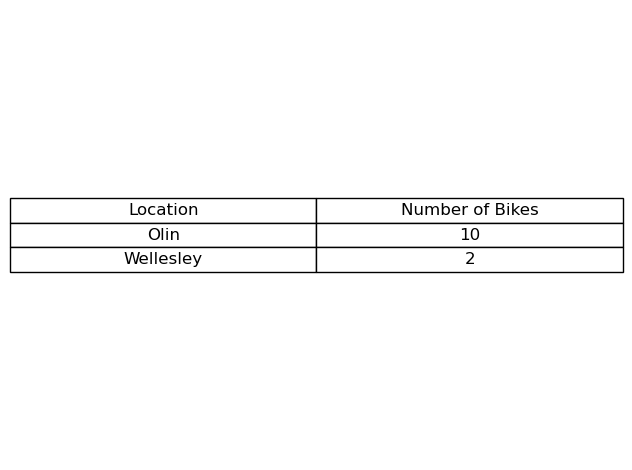

In [127]:
# Data for the table
data = [["Olin", bikeshare.olin], ["Wellesley", bikeshare.wellesley]]

# Create a figure and axis
fig, ax = plt.subplots()

# Hide the axes
ax.axis('off')
ax.axis('tight')

# Create the table
table = ax.table(cellText=data, colLabels=["Location", "Number of Bikes"], cellLoc='center', loc='center')

# Adjust layout and display
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)
fig.tight_layout()

# Show the table
plt.show()

#### **Adjustments to BikeShare Values**

Two students move a bike (each) from Olin to Wellesley:

In [128]:
bikeshare.move_bikes('olin', 'wellesley', 2)
print(bikeshare)


Moved 2 bikes from olin to wellesley.
Bikeshare(olin=8, wellesley=4)


#### Use the dot operator to change values

In [129]:
bikeshare.olin = 9
bikeshare.wellesley = 3
print(bikeshare)

Bikeshare(olin=9, wellesley=3)


#### Use update operator to change values

In [130]:
bikeshare.olin -= 1
bikeshare.wellesley += 1
print(bikeshare)

Bikeshare(olin=8, wellesley=4)


#### Use function to add a single value to wellesley and olin

In [131]:
bikeshare.bike_to_wellesley()

'Moved 1 bike from Olin to Wellesley.'

In [132]:
bikeshare.bike_to_olin()

'Moved 1 bike from Wellesley to Olin.'

#### Random function picks one of three scenarios on moving bikes

In [133]:
bikeshare.random_move()

Number: 0.66
Random number: 0.66, Action: Moved 1 bike from Olin to Wellesley.


'Moved 1 bike from Olin to Wellesley.'

In [134]:
bikeshare.random_move()

Number: 0.19
Random number: 0.19, Action: Moved 1 bike from Wellesley to Olin.


'Moved 1 bike from Wellesley to Olin.'

In [135]:
bikeshare.random_move()

Number: 0.97
No bikes were shared.
Random number: 0.97, Action: No bikes were shared


'No bikes were shared'

In [136]:
bikeshare.random_move()

Number: 0.25
Random number: 0.25, Action: Moved 1 bike from Wellesley to Olin.


'Moved 1 bike from Wellesley to Olin.'

In [137]:
bikeshare.random_move()

Number: 0.49
Random number: 0.49, Action: Moved 1 bike from Olin to Wellesley.


'Moved 1 bike from Olin to Wellesley.'

In [138]:
bikeshare.random_move()

Number: 0.19
Random number: 0.19, Action: Moved 1 bike from Wellesley to Olin.


'Moved 1 bike from Wellesley to Olin.'

In [139]:
bikeshare.random_move()

Number: 0.99
No bikes were shared.
Random number: 0.99, Action: No bikes were shared


'No bikes were shared'

#### Use a List Comprehension to generate a loop of random_move

Number: 0.79
Random number: 0.79, Action: Moved 1 bike from Olin to Wellesley.
Number: 0.45
Random number: 0.45, Action: Moved 1 bike from Olin to Wellesley.
Number: 0.95
No bikes were shared.
Random number: 0.95, Action: No bikes were shared
Number: 0.39
Random number: 0.39, Action: Moved 1 bike from Olin to Wellesley.
Number: 0.27
Random number: 0.27, Action: Moved 1 bike from Wellesley to Olin.
Number: 0.77
Random number: 0.77, Action: Moved 1 bike from Olin to Wellesley.
Number: 0.45
Random number: 0.45, Action: Moved 1 bike from Olin to Wellesley.
Number: 0.63
Random number: 0.63, Action: Moved 1 bike from Olin to Wellesley.
Number: 0.38
Random number: 0.38, Action: Moved 1 bike from Olin to Wellesley.
Number: 0.28
Random number: 0.28, Action: Moved 1 bike from Wellesley to Olin.
Number: 0.22
Random number: 0.22, Action: Moved 1 bike from Wellesley to Olin.


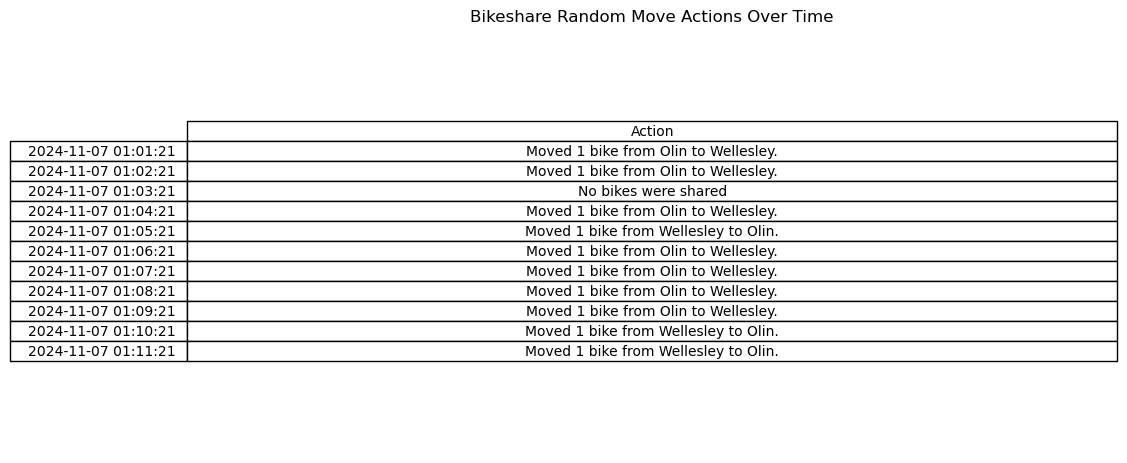

In [141]:
# Generate the data with list comprehension
n = 11  # Number of time series entries
start_time = datetime.now()
timestamps = [start_time + timedelta(minutes=i) for i in range(n)]
actions = [bikeshare.random_move() for _ in range(n)]

# Create the DataFrame
time_series_df = pd.DataFrame({"Timestamp": timestamps, "Action": actions})
time_series_df.set_index("Timestamp", inplace=True)

# Plotting the table with matplotlib
fig, ax = plt.subplots(figsize=(10, len(time_series_df) * 0.5))  # Adjust height based on the number of entries
ax.axis('off')  # Hide the axis

# Create the table
table = ax.table(
    cellText=time_series_df.values,                 # Data values
    colLabels=time_series_df.columns,               # Column headers
    rowLabels=time_series_df.index.strftime('%Y-%m-%d %H:%M:%S'),  # Formatted index
    cellLoc='center',                               # Center-align cells
    loc='center'                                    # Center the table in the figure
)

# Adjust the table for readability
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)

# Add title and show the plot
plt.title("Bikeshare Random Move Actions Over Time")
plt.show()


In [142]:
print(bikeshare)


Bikeshare(olin=2, wellesley=10)
